In [32]:
import os
import io
import base64
import sqlite3
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

In [33]:
CURR_PATH = os.getcwd()
PROJECT_PATH = os.path.dirname(CURR_PATH)
DATA_PATH = os.path.join(PROJECT_PATH, 'data')
TRAIN_PATH = os.path.join(DATA_PATH, 'train')
TEST_PATH = os.path.join(DATA_PATH, 'test')
RES_PATH = os.path.join(PROJECT_PATH, 'res')
MODELS_PATH = os.path.join(PROJECT_PATH, 'models')
RLHF_PATH = os.path.join(DATA_PATH, 'RLHF.db')

### Train Data

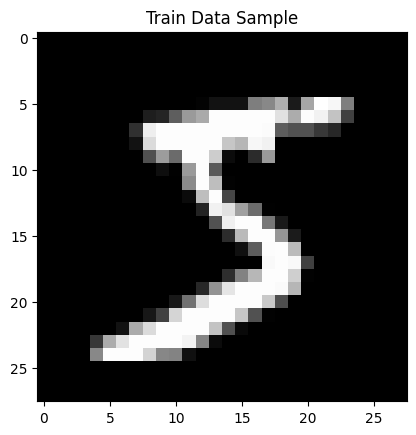

In [34]:
mnist_trainset = datasets.MNIST(
    root=TRAIN_PATH, 
    train=True, 
    download=True, 
    transform=ToTensor()
)

plt.title("Train Data Sample")
plt.imshow(mnist_trainset[0][0].permute(1, 2, 0), cmap="gray")
plt.show()

### Original Data From Frontend

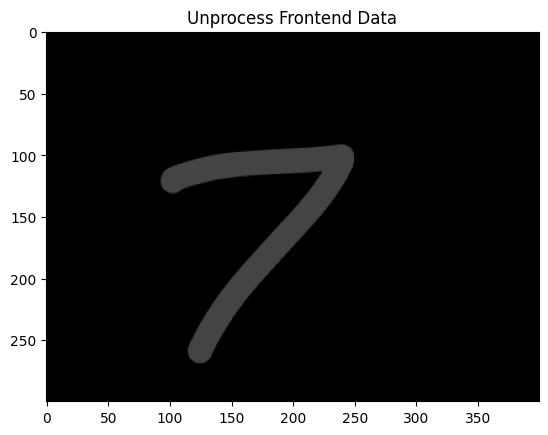

In [35]:
def get_data(sql_path, tableName):
    # connecting sql
    conn = sqlite3.connect(sql_path)

    # query to pandas on forecast table
    df = pd.read_sql_query(f"SELECT * FROM {tableName}", conn)

    return df

df = get_data(RLHF_PATH, 'train_digit')

# Decode the base64-encoded image string
image_string = base64.b64decode(df['image'][4])
# Open and preprocess the image
image = Image.open(io.BytesIO(image_string))

plt.title("Unprocess Frontend Data")
plt.imshow(image, cmap="gray")
plt.savefig(os.path.join(RES_PATH, 'unprocess.png'))


### Version 1 Preprocess

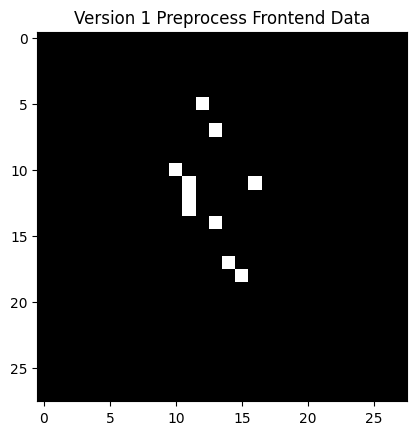

In [36]:
# Decode the base64-encoded image string
image_string = base64.b64decode(df['image'][0])
# Open and preprocess the image
image = Image.open(io.BytesIO(image_string))
image = image.convert('1') # Convert to black and white
image = image.resize((28,28)) # Resize the image

plt.title("Version 1 Preprocess Frontend Data")
plt.imshow(image, cmap="gray")
plt.savefig(os.path.join(RES_PATH, 'version_one_preprocess.png'))

### Version 2 Preprocess

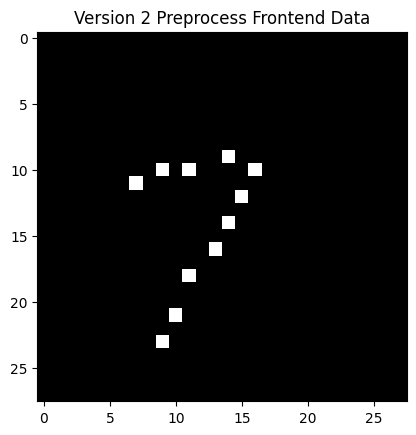

In [37]:
# Decode the base64-encoded image string
image_string = base64.b64decode(df['image'][4])
# Open and preprocess the image
image = Image.open(io.BytesIO(image_string))
image = image.resize((28,28)) # Resize the image
image = image.convert('1') # Convert to black and white

plt.title("Version 2 Preprocess Frontend Data")
plt.imshow(image, cmap="gray")
plt.savefig(os.path.join(RES_PATH, 'version_two_preprocess.png'))
